<a href="https://colab.research.google.com/github/ejliendov/sales-prediccions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cargando los datos del proyecto

In [1]:
# Montando el volumen
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno
import seaborn as sb

In [3]:
# Cargando el dataframe
filename = '/content/drive/MyDrive/Coding Dojo/sales_predictions.csv'
df = pd.read_csv(filename)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Explorando el dataframe

In [4]:
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Aquí notamos que hay valores faltantes en varios campos

---
Profundicemos un poco más para ver cuáles variables tienen 'valores faltantes' (missings)

In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Acá vemos que en principo, los campos 'Item_Wieght' y 'Outlet_Size' tienen valores faltantes...

---
Veamos la situación de los valores faltantes con más detalle...



# Tratando los valores faltantes

---
Usemos la librería 'missingno' para identificar visualmente los valores faltantes en nuestro dataframe

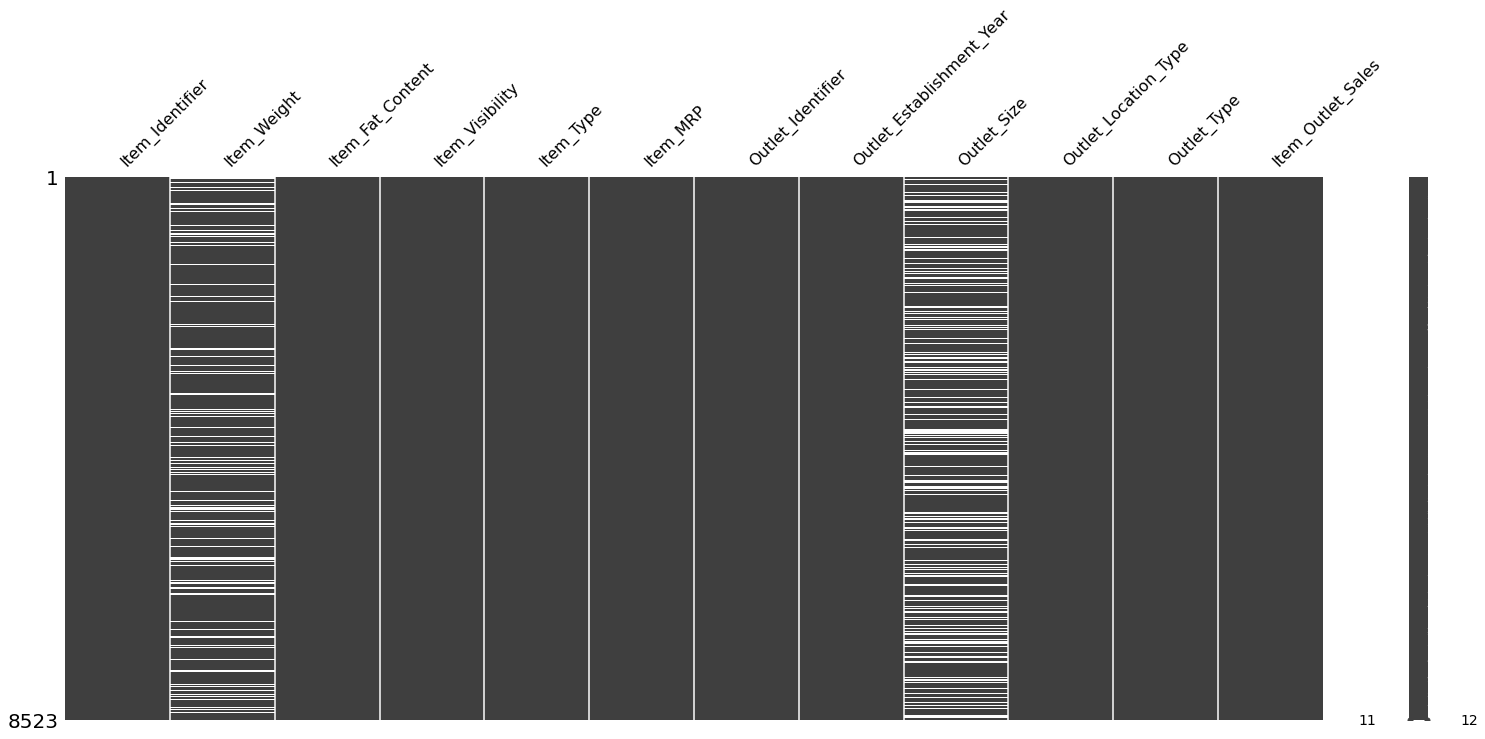

In [7]:
# Usando un gráfico de matrix de la cantidad de valorres 'no faltantes'
missingno.matrix(df)

En el gráfico anterior podemos apreciar como las variables 'Item_Wieght' y 'Outlet_Size' aparecen muy segmentadas en el gráfico de barra, lo cual nos indica visualmente de manera muy rápida que presentan una cantidad importante de valores faltantes.

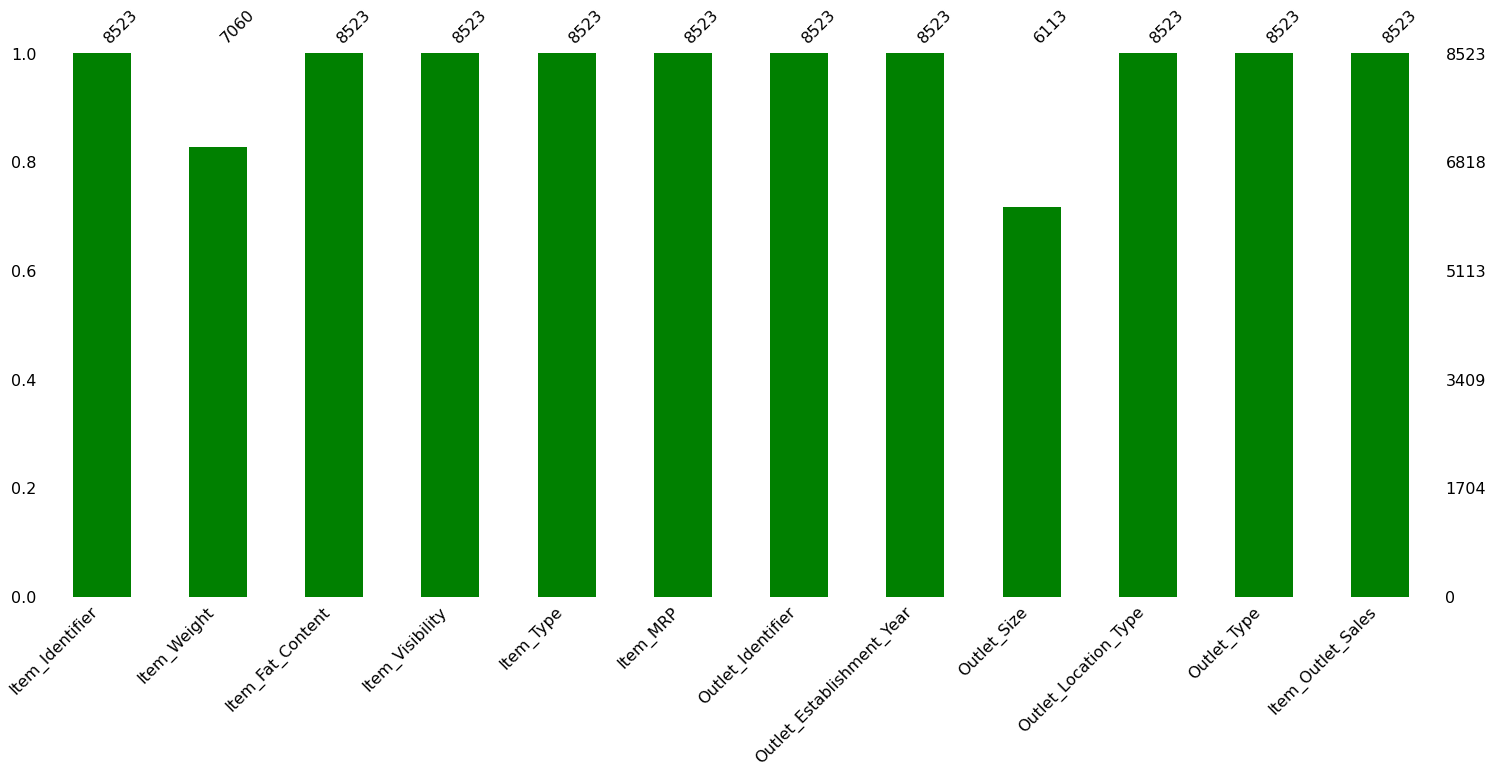

In [8]:
# Usando un gráfico de barra de la cantidad de valorres 'no faltantes'
missingno.bar(df, color='green')

El gráfico anterior nos muestra la cantidad de valores 'no faltantes' en nuestro dataset. 
Podemos notar rápidamente como la variable 'Item_Weight' tiene poco más del 80% de valores 'no faltantes', es decir que menos del 20% de los valores de esta variable son 'missings'.

Mientras que para la variable 'Outlet_Size' este prcentaje está cercano al 70% (valores no faltantes)

# Primeros Análisis

In [9]:
# Renombramos nuestro dataframe para conservar el original
df1 = df

Veamos el tipo de producto que más se vende


In [10]:
df2 = df1.groupby(['Item_Type'])[['Item_Outlet_Sales']].sum()
df2 = df2.sort_values(by='Item_Outlet_Sales', ascending=True)
df2

,Item_Outlet_Sales
Item_Type,
Seafood,1.488682e+05
Breakfast,2.322990e+05
Others,3.255176e+05
Starchy Foods,3.514013e+05
Hard Drinks,4.577934e+05
Breads,5.532372e+05
Soft Drinks,8.928977e+05
Meat,9.175656e+05
Health and Hygiene,1.045200e+06


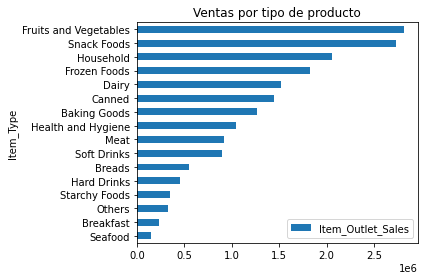

In [11]:
plot_item_type = df2.plot.barh(y='Item_Outlet_Sales', title='Ventas por tipo de producto')
# Reducir el tamaño del gráfico para guardarlo
plt.tight_layout()

En el gráfico anterior vemos que los tipos de produtos más vendidos son 'Frutas y Vegetales' y 'Sanck foods'

Veamos ahora por contenido de grasa

In [12]:
df3 = df1.groupby(['Item_Fat_Content'])[['Item_Outlet_Sales']].sum()
df3

,Item_Outlet_Sales
Item_Fat_Content,
LF,6.552424e+05
Low Fat,1.101503e+07
Regular,6.457454e+06
low fat,2.338270e+05
reg,2.295765e+05


En la tabla anterior vemos que hay datos que están mal codificados, debemos corregir esto para continuar con el análisis...

In [13]:
df1['Item_Fat_Content']=df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'})

Y ahora volvemos a hacer el groupby anterior...

In [14]:
df3 = df1.groupby(['Item_Fat_Content'])[['Item_Outlet_Sales']].sum()
df3

,Item_Outlet_Sales
Item_Fat_Content,
Low Fat,1.190409e+07
Regular,6.687031e+06


Ya está corregido y ahora mostramos un 'piechart'

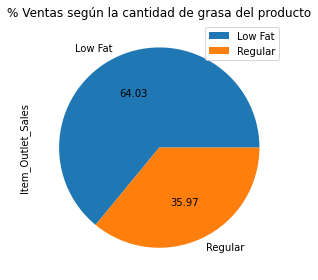

In [15]:
plot_fat = df3.plot(y='Item_Outlet_Sales',kind='pie', autopct='%.2f', 
                      title='% Ventas según la cantidad de grasa del producto')
# Reducir el tamaño del gráfico para guardarlo
plt.tight_layout()

En el gráfico anterior vemos que los productos 'Regular' representan el 64,03% de las ventas, mientras que los productos 'Low Fat' representan el 35,97% 

Veamos ahora la sitación por tiendas...

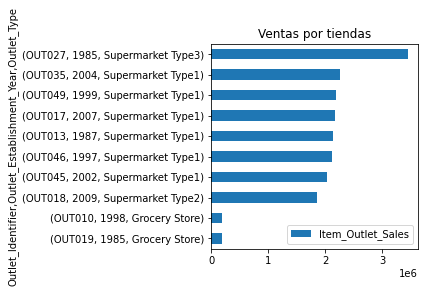

In [16]:
# Agrupamos por tienda y por antiguedad de la tienda, y ordenamos por ventas
df4 = df1.groupby(['Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type'])[['Item_Outlet_Sales']].sum()
df4 = df4.sort_values(by='Item_Outlet_Sales', ascending=True)
# Graficamos
plot_item_type = df4.plot.barh(y='Item_Outlet_Sales', title='Ventas por tiendas')
# Reducir el tamaño del gráfico para guardarlo
plt.tight_layout()

En el gráfico anterior vemos varias cosas interesantes:
 . No obstante, le 

*   La tienda 'OUT27' fundada en 1985 es la que más vende y s de tipo 'Supermarket Type1'
*   tienda 'OUT35' fundada en 2004 es la segunda en ventas y es de tipo 'Supermarket Type2'
*   Estos resultados nos hacen presumir que la antiguedad de la tienda no está necesariamente relacionada al tamaño de sus ventas.
*   El tipo de tiendo parece influir m{as que la antiguedad.



---

Veamos por tipo de tienda...

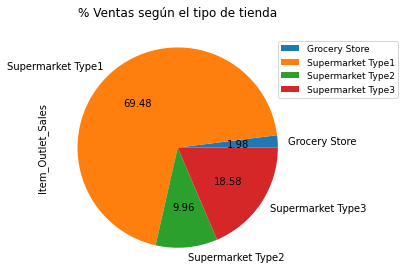

In [17]:
# Agrupamos por tipo de tienda
df5 = df1.groupby(['Outlet_Type'])[['Item_Outlet_Sales']].sum()

# Generamos un 'piechart'
plot_outlet_type = df5.plot(y='Item_Outlet_Sales',kind='pie', autopct='%.2f', 
                      title='% Ventas según el tipo de tienda')

# Ajustando la leyenda
plt.legend(loc=(0.9,0.7), fontsize=9)

# Reducir el tamaño del gráfico para guardarlo
plt.tight_layout()

En el gráfico anterior vemos como las tiendas tipo 'Supermarket Type1' son las que más ventas generan con el 69,48%, seguidas por las tipo 'Supermarket Type3' con 18.58%

# Continuando con los análisis exploratorios

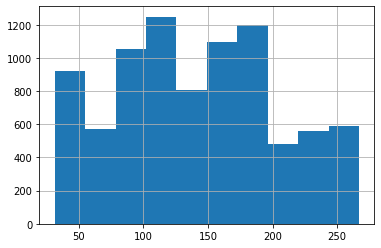

In [19]:
df['Item_MRP'].hist()

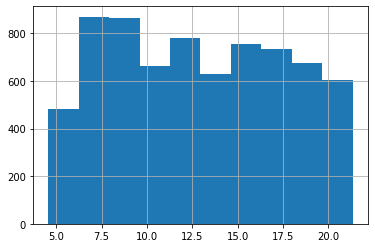

In [20]:
df['Item_Weight'].hist()

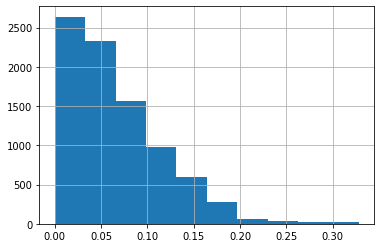

In [22]:
df['Item_Visibility'].hist()

In [18]:
df1.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000
